Pipeline illustration
====
Starting from a masked image, show all the steps

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
"""
Read in and display an image + mask

"""
import pathlib
import numpy as np
import matplotlib.pyplot as plt

img_index = "0200"

data_dir = "data/"
image_path = pathlib.Path(data_dir) / "original cut" / f"{img_index}.tif"
mask_path = pathlib.Path(data_dir) / "masks cut" / f"{img_index}.tif"

# Check that they exist
assert image_path.exists(), image_path
assert mask_path.exists(), mask_path

raw_image = plt.imread(image_path)
raw_mask = plt.imread(mask_path)

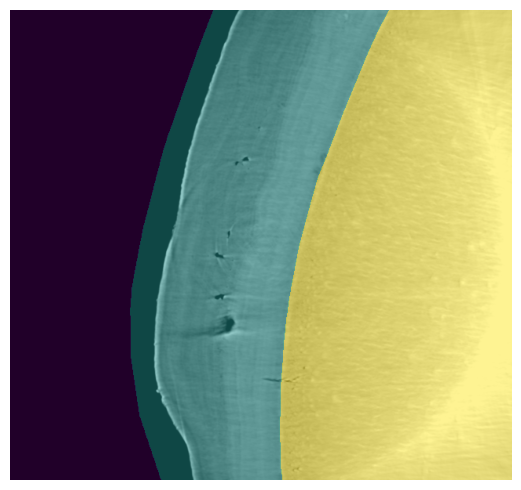

In [3]:
fig, axis = plt.subplots(1, 1, figsize=(10, 5))

axis.imshow(raw_image, cmap="gray")
axis.imshow(raw_mask, alpha=0.5)

axis.set_axis_off()

fig.tight_layout()

Straightening
----
First we want to straighten this image so the cementum layers run up/down the image.

We'll do this by finding a set of affine transformations that map points in the curved image above onto a straightened image...

In [4]:
"""
Straighten the image and mask

This works by building two meshes of points: one that curves to follow the mask, and one that is straight
We then find affine transformations that map the straight mesh to the curved mesh, and apply them to the image and mask

see straighten_mesh.ipynb for more details

"""
from cementum import straighten  # This is my library of helper functions
import timeit

# We need to choose how many points we have on the left/inside/right of the mask
n_y = 50  # How many points we have on the y-axis
n_x = 5, 5, 5  # How many points we have to the left/inside/right of the mask

start_time = timeit.default_timer()
curve_pts = straighten.mask_mesh(raw_mask, n_y, n_x)
straight_pts = straighten.straight_mesh(raw_mask, n_y, n_x)
elapsed = timeit.default_timer() - start_time

print(f"Creating meshes: {elapsed:.2f} seconds")

Creating meshes: 0.02 seconds


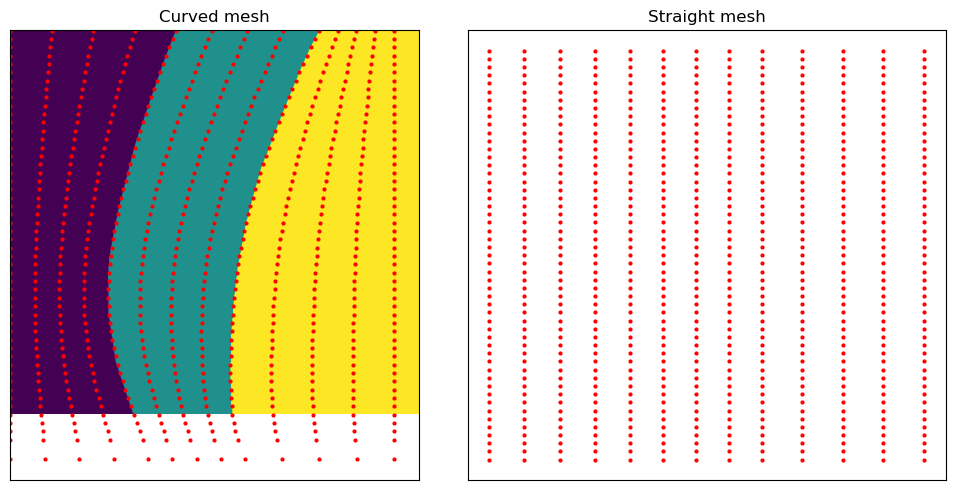

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_kw = {"marker": "o", "linestyle": "none", "markersize": 2, "color": "r"}

axes[0].imshow(raw_mask)
axes[0].plot(curve_pts[:, 0], curve_pts[:, 1], **plot_kw)

axes[1].plot(straight_pts[:, 0], straight_pts[:, 1], **plot_kw)

for axis in axes:
    axis.set_xticks([])
    axis.set_yticks([])

axes[0].set_title("Curved mesh")
axes[1].set_title("Straight mesh")

fig.tight_layout()

In [6]:
"""
Use these meshes to bend the image into something straight

"""
start_time = timeit.default_timer()
straight_image = straighten.apply_transformation(
    raw_image, curve_pts, straight_pts, order=0
)
img_elapsed = timeit.default_timer() - start_time

print(f"Img straightening: {img_elapsed:.2f} seconds")

Img straightening: 1.89 seconds


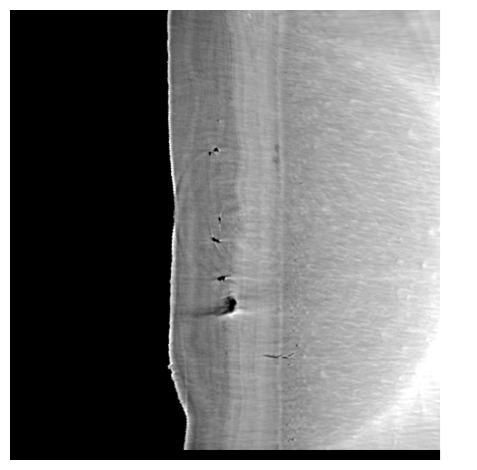

In [7]:
fig, axis = plt.subplots()

axis.imshow(straight_image, cmap="gray")
axis.set_axis_off()

fig.tight_layout()